<a href="https://colab.research.google.com/github/ricardossiqueira/redes_neurais/blob/main/redes_neurais_lista_1_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"])
df.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
55,5.7,2.8,4.5,1.3,Iris-versicolor
74,6.4,2.9,4.3,1.3,Iris-versicolor
36,5.5,3.5,1.3,0.2,Iris-setosa
149,5.9,3.0,5.1,1.8,Iris-virginica
16,5.4,3.9,1.3,0.4,Iris-setosa


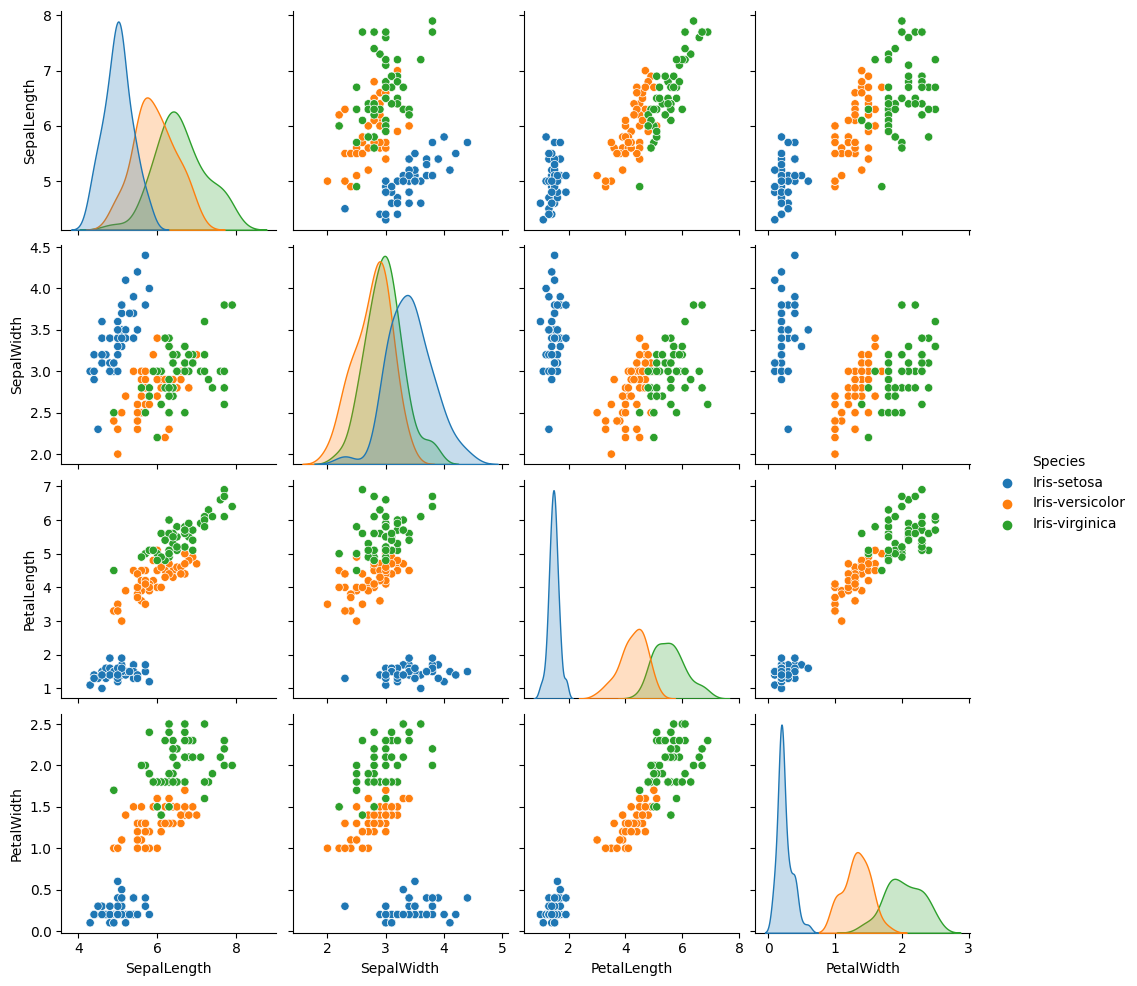

In [ ]:
sns.pairplot(data=df, vars=("SepalLength", "SepalWidth", "PetalLength", "PetalWidth"), hue="Species")

In [ ]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Aqui fizemos uma separação simples dos dados em treino e teste, separando 30% do dataset para teste. Também não realizaremos nenhuma etapa de preparação dos dados como sugerido no enunciado da questão.

In [ ]:
train, test = train_test_split(df, test_size=0.3)

trainX = train[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
trainY = train.Species

testX = test[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
testY = test.Species

trainX.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth
16,5.4,3.9,1.3,0.4
23,5.1,3.3,1.7,0.5
95,5.7,3.0,4.2,1.2
93,5.0,2.3,3.3,1.0
103,6.3,2.9,5.6,1.8


Aqui vamos definir o 1000 epochs, tendo em vista que alguns modelos utilizados precisarão de muitas iterações para convergirem. Também adicionamos o parâmetro early_stopping para que o modelo pare quando o resultado já tiver convergido.

In [ ]:
mlp = MLPClassifier(max_iter=1000)

Aqui definimos os hiperparâmetros que serão utlizados na permutação. Seja logistic a função de ativação sigmoide, adam uma variação do sgd "otimizada" e lbfgs um otimizador da família quasi-Newton. Vamos discutir mais a frente as diferenças de cada um e como se comportaram na tarefa de classificação.

In [ ]:
parameter_space = {
    "hidden_layer_sizes": [(50,50,50), (50,100,50), (100,)],
    "activation": ["tanh", "relu", "logistic"],
    "solver": ["sgd", "adam", "lbfgs"],
    "alpha": [1e-4, 1e-3, 1e-2],
    "learning_rate": ["constant"],
    "early_stopping": [True]
}

In [ ]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=1, cv=3)
clf.fit(trainX, trainY)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000), n_jobs=1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

In [ ]:
print("Best params found:\n", clf.best_params_)

means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std*2, params))

Best params found:
 {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.638 (+/-0.071) for {'activation': 'tanh', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.857 (+/-0.168) for {'activation': 'tanh', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.981 (+/-0.027) for {'activation': 'tanh', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.705 (+/-0.194) for {'activation': 'tanh', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.829 (+/-0.233) for {'activation': 'tanh', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver':

In [ ]:
overall_mean = {"tanh": [], "relu": [], "logistic": []}
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
  if params["activation"] == "tanh":
    overall_mean["tanh"].append(mean)

  if params["activation"] == "relu":
    overall_mean["relu"].append(mean)
  
  if params["activation"] == "logistic":
    overall_mean["logistic"].append(mean)

for l in np.array(list(overall_mean.values())):
  print(np.mean(l))

0.7844797178130513
0.7361552028218692
0.582716049382716


Agora analisaremos os resultados obtidos no item anterior para cada bloco de parâmetros permutados. A primeira segmentação dos resultados que faremos será na função de ativação utilizada. Temos que a média das performances das funções de ativação foram _tanh_ > _relu_ > _logistic_ (0.78 > 0.74 > 0.58).

Analisando os métodos de regressão utilizados - _lbfgs_, _adam_ e _sgd_ - por simples inspeção dos resultados notamos que as performances atingidas são dadas, de maneira geral, da seguinte maneira: _lbfgs_ > _adam_ > _sgd_. Pela [documentação da classe](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) percebemos que esse resultado já era esperado, tendo em vista que de acordo com o descritivo do parâmetro temos: 
- '_lbfgs_' é um otimizador da familia de métodos quasi-Newton que pode convergir mais rapidamente e performar melhor para datasets pequenos;
- '_sgd_' é o gradiente descendente estocástico padrão;
- '_adam_' é uma otimização do gradiente descendente estocástico - proposta por Kingma, Diederik, e Jimmy Ba - e, de maneira geral, funciona bem melhor para datasets relativamente grandes (com milhares de amostras de treinamento ou mais), tanto em termos de tempo de treintamento, quanto em termos de acertos em validação;

Logo, como nosso dataset é pequeno, apenas 150 amostras, já era esperado que o método _lbfgs_ performasse melhor que os outros.

Agora, vamos voltar nossa atenção para a quantidade de camadas utilizadas e realizar uma análise qualitativa, também por simples inspeção dos resultados. Aqui utilizamos, novamente, 3 abordagens diferentes em termos de camadas e quantidades de neurônios, foram elas:
- (100,) - apenas uma camada com 100 neurônios;
- (50, 50, 50) 3 camadas com 50 neurônios cada;  
- (50, 100, 50) - 3 camadas com 50, 100 e 50 neurônios, respectivamente;

De maneira geral, o método _lbfgs_ foi agnóstico quanto a quantidade de neurônios e a distribuição em mais camadas, performando sempre 0.9 ou mais para todas as combinações possíveis. Destaca-se ainda o caso (50, 50, 50) - 3 camadas com 50 neurônios cada - nessa abordagem os resultados também foram superiores para a técnica _lbfgs_ com grande folga, mas foram especialmente dispares quando combinados com a função de ativação _logistic_. Nesse caso, tanto o _sgd_ quanto o _adam_ obtiveram resultados na casa do 0.3, enquanto o _lbfgs_ pontou na casa do 0.9.



In [ ]:
testX_report, testY_report = testY, clf.predict(testX)
print("Results on the test set:\n", classification_report(testX_report, testY_report))

Results on the test set:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.82      0.90        17
 Iris-virginica       0.84      1.00      0.91        16

       accuracy                           0.93        45
      macro avg       0.95      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45

